In [2]:
from ema import read

qnaire_answers = read._qnaire_df()

Text(0.5, 0.98, 'Around $\\frac{1}{3}$ of participants agreed')

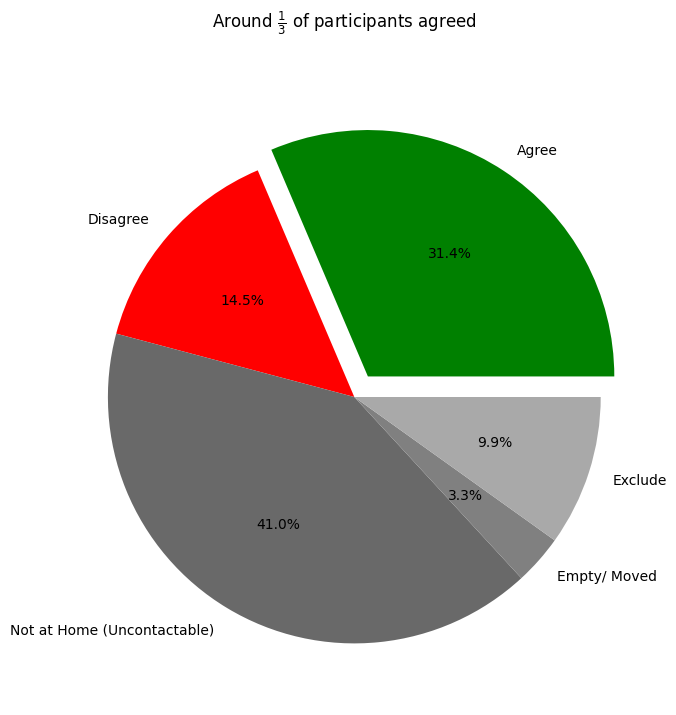

In [18]:
""" Make a pie chart showing how many people accepted """
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

reload(read)

# Count how many people in each category
response_codes, counts = np.unique(
    qnaire_answers["respondent_status"], return_counts=True
)

response_lookup = read.qnaire_status_codebook()

labels = [response_lookup[code] for code in response_codes]

colours = ["green", "red", "dimgrey", "grey", "darkgrey", "lightgrey"]
percentages = [count / np.sum(counts) for count in counts]

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    counts,
    explode=[0.1, *[0.0] * (len(counts) - 1)],
    labels=labels,
    colors=colours,
    autopct="%1.1f%%",
)

fig.suptitle(r"Around $\frac{1}{3}$ of participants agreed")

In [39]:
# Add a column for age group
qnaire_answers["age_group"] = 0

age_col = qnaire_answers.loc[:, "age_dob"]

qnaire_answers.loc[age_col > 5, "age_group"] += 1
qnaire_answers.loc[age_col > 10, "age_group"] += 1

qnaire_answers["age_group"].dropna().value_counts()

age_group
0    1367
2     457
1     169
Name: count, dtype: int64

ValueError: at least one proportion should be greater than zero

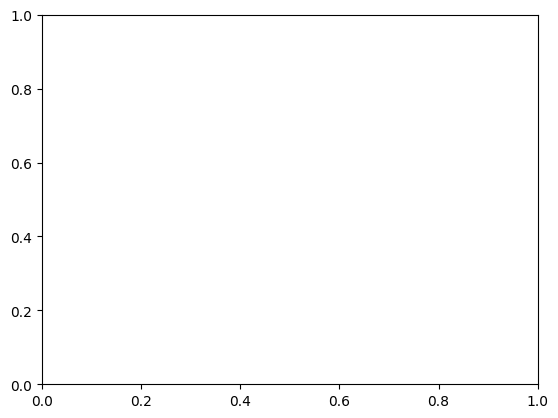

In [22]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

table = pd.crosstab(qnaire_answers["respondent_status"], qnaire_answers["respondent_sex"], margins=True)
mosaic(qnaire_answers, ["respondent_status", "respondent_sex", "respondent_ethnicity", "age_dob"])